In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns  # 시각화 라이브러리


In [2]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
train = pd.read_csv('data/data.csv', index_col = 'day_text')

### 결측치 채우기

In [4]:
#결측치 확인
train.isnull().sum()

time_text         0
team_text         0
location          0
H_text            0
HR_text           0
S_text            0
ST_text           0
DU_text           0
ER_text           0
result_text       0
temp              0
rain           7212
wind              2
d_wind            2
humidity          0
atmosphere        0
surface           2
dtype: int64

In [5]:
#결측치 0으로 채우기
train['rain'] = train['rain'].fillna('0')
train['wind'] = train['wind'].fillna('0')
train['d_wind'] = train['d_wind'].fillna('0')
train['surface'] = train['surface'].fillna('0')

In [6]:
train.isnull().sum()

time_text      0
team_text      0
location       0
H_text         0
HR_text        0
S_text         0
ST_text        0
DU_text        0
ER_text        0
result_text    0
temp           0
rain           0
wind           0
d_wind         0
humidity       0
atmosphere     0
surface        0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_text    10230 non-null  object 
 1   team_text    10230 non-null  object 
 2   location     10230 non-null  object 
 3   H_text       10230 non-null  int64  
 4   HR_text      10230 non-null  int64  
 5   S_text       10230 non-null  int64  
 6   ST_text      10230 non-null  int64  
 7   DU_text      10230 non-null  int64  
 8   ER_text      10230 non-null  int64  
 9   result_text  10230 non-null  int64  
 10  temp         10230 non-null  float64
 11  rain         10230 non-null  object 
 12  wind         10230 non-null  object 
 13  d_wind       10230 non-null  object 
 14  humidity     10230 non-null  int64  
 15  atmosphere   10230 non-null  float64
 16  surface      10230 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.4+ MB


<AxesSubplot:>

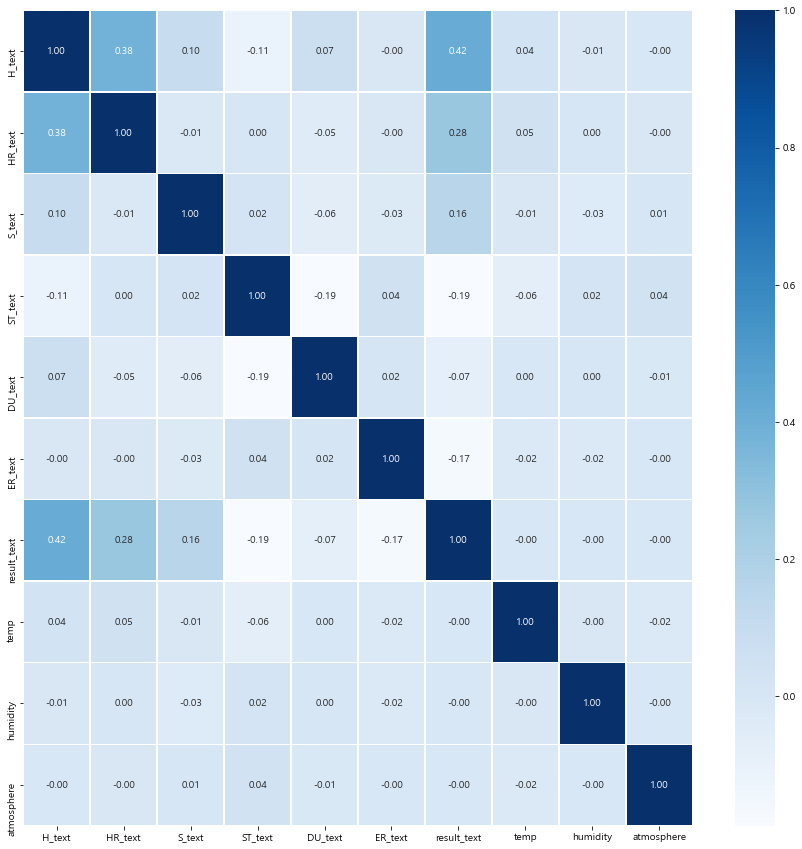

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
train['rain'] = train['rain'].astype('float64')
train['wind'] = train['wind'].astype('float64')
train['d_wind'] = train['d_wind'].astype('float64')
train['atmosphere'] = train['atmosphere'].astype('float64')
train['surface'] = train['surface'].astype('float64')

### 원핫인코딩

In [10]:
cat_feature = ['team_text','location']

In [11]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    train = pd.concat([train, dummy], axis = 1)
    train.drop(i, axis=1, inplace = True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           10230 non-null  object 
 1   H_text              10230 non-null  int64  
 2   HR_text             10230 non-null  int64  
 3   S_text              10230 non-null  int64  
 4   ST_text             10230 non-null  int64  
 5   DU_text             10230 non-null  int64  
 6   ER_text             10230 non-null  int64  
 7   result_text         10230 non-null  int64  
 8   temp                10230 non-null  float64
 9   rain                10230 non-null  float64
 10  wind                10230 non-null  float64
 11  d_wind              10230 non-null  float64
 12  humidity            10230 non-null  int64  
 13  atmosphere          10230 non-null  float64
 14  surface             10230 non-null  float64
 15  team_text_KIA 타이거즈  10230 non-null  uint8  
 16  team_t

### 데이터 7:3으로 나누기

In [13]:
#7대 3으로 데이터 나누기
X = train.drop('DU_text',axis = 1)
y = train['DU_text']

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.3,
                                                  #stratify = y,
                                                  random_state = 3)

In [14]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(7161, 32) (7161,) (3069, 32) (3069,)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 9.5수 to 8.2일
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           7161 non-null   object 
 1   H_text              7161 non-null   int64  
 2   HR_text             7161 non-null   int64  
 3   S_text              7161 non-null   int64  
 4   ST_text             7161 non-null   int64  
 5   ER_text             7161 non-null   int64  
 6   result_text         7161 non-null   int64  
 7   temp                7161 non-null   float64
 8   rain                7161 non-null   float64
 9   wind                7161 non-null   float64
 10  d_wind              7161 non-null   float64
 11  humidity            7161 non-null   int64  
 12  atmosphere          7161 non-null   float64
 13  surface             7161 non-null   float64
 14  team_text_KIA 타이거즈  7161 non-null   uint8  
 15  team_text_LG 트윈스    7161 non-null   uint8  
 16  team_tex

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 9.1일 to 5.13일
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           3069 non-null   object 
 1   H_text              3069 non-null   int64  
 2   HR_text             3069 non-null   int64  
 3   S_text              3069 non-null   int64  
 4   ST_text             3069 non-null   int64  
 5   ER_text             3069 non-null   int64  
 6   result_text         3069 non-null   int64  
 7   temp                3069 non-null   float64
 8   rain                3069 non-null   float64
 9   wind                3069 non-null   float64
 10  d_wind              3069 non-null   float64
 11  humidity            3069 non-null   int64  
 12  atmosphere          3069 non-null   float64
 13  surface             3069 non-null   float64
 14  team_text_KIA 타이거즈  3069 non-null   uint8  
 15  team_text_LG 트윈스    3069 non-null   uint8  
 16  team_te

### Time_text Drop

In [17]:
X_train.drop('time_text', axis = 1 , inplace = True)

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
X_test.drop('time_text', axis = 1, inplace = True)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 9.1일 to 5.13일
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              3069 non-null   int64  
 1   HR_text             3069 non-null   int64  
 2   S_text              3069 non-null   int64  
 3   ST_text             3069 non-null   int64  
 4   ER_text             3069 non-null   int64  
 5   result_text         3069 non-null   int64  
 6   temp                3069 non-null   float64
 7   rain                3069 non-null   float64
 8   wind                3069 non-null   float64
 9   d_wind              3069 non-null   float64
 10  humidity            3069 non-null   int64  
 11  atmosphere          3069 non-null   float64
 12  surface             3069 non-null   float64
 13  team_text_KIA 타이거즈  3069 non-null   uint8  
 14  team_text_LG 트윈스    3069 non-null   uint8  
 15  team_text_NC 다이노스   3069 non-null   uint8  
 16  team_te

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 9.5수 to 8.2일
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              7161 non-null   int64  
 1   HR_text             7161 non-null   int64  
 2   S_text              7161 non-null   int64  
 3   ST_text             7161 non-null   int64  
 4   ER_text             7161 non-null   int64  
 5   result_text         7161 non-null   int64  
 6   temp                7161 non-null   float64
 7   rain                7161 non-null   float64
 8   wind                7161 non-null   float64
 9   d_wind              7161 non-null   float64
 10  humidity            7161 non-null   int64  
 11  atmosphere          7161 non-null   float64
 12  surface             7161 non-null   float64
 13  team_text_KIA 타이거즈  7161 non-null   uint8  
 14  team_text_LG 트윈스    7161 non-null   uint8  
 15  team_text_NC 다이노스   7161 non-null   uint8  
 16  team_tex

In [21]:
set(X_train.columns) - set(X_test.columns)

set()

### KNNRegressor

In [22]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
result1 = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result1

array([-0.27995951, -0.28450151, -0.37363002, -0.38685735, -0.2443719 ])

In [23]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 세트 예측: {}".format(knn_model.predict(X_test)))

테스트 세트 예측: [1.         0.         0.33333333 ... 1.66666667 0.66666667 1.        ]


In [25]:
print("테스트 세트 정확도: {:.2f}".format(knn_model.score(X_test, y_test)))

테스트 세트 정확도: -0.27


C:\Users\smhrd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


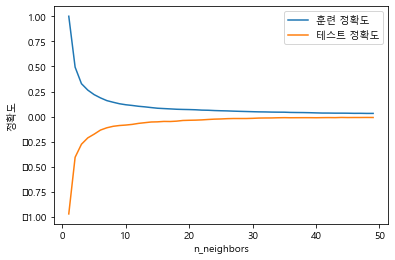

In [26]:

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # 모델 생성
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(knn_model.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(knn_model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### SVM

In [ ]:
svm_model = LinearSVR()

### Lasso

In [27]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV

In [29]:
# alpha : 0.01 ~ 100 사이 / 값 범위가 크다. (default = 1)
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [37]:
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))

train score:  0.00016934604145169008
test score :  -0.0004295546607120393


In [38]:
lasso_model.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.10952949e-05, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [39]:
np.sum(lasso_model.coef_ == 0)

30

In [40]:
# np.sum() 함수
# True 의 개수를 세어줌

np.sum(lasso_model.coef_ != 0)

1

In [41]:
# False = 가중치 0
# True = 가중치가 0이 아님

lasso_model.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [42]:
lasso_model.coef_ != 0

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [43]:
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

사용한 특성의 개수 :  1


In [44]:
# alpha 값을 낮춰주면 사용하는 특성의 개수가 늘어난다.

lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

train score:  0.061323965307703676
test score :  0.06799613988995168
사용한 특성의 개수 :  10


In [45]:
# alpha 값을 낮춰주면 사용하는 특성의 개수가 늘어난다.

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

train score:  0.06426176632386238
test score :  0.07243783314478691
사용한 특성의 개수 :  23
